<a href="https://colab.research.google.com/github/Lekanville/todomvc/blob/master/CNN_Handwriting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import save
from numpy import load
import matplotlib.pyplot as plt

In [ ]:
from numpy import save
from numpy import load

In [ ]:
data_train = pd.read_csv('drive/MyDrive/Colab Notebooks/Handwriting Classification/dat.csv')

In [ ]:
data_train

,image,label
0,Data/1D/Capture1.JPG,1
1,Data/1D/Capture10.JPG,1
2,Data/1D/Capture100.JPG,1
3,Data/1D/Capture101.JPG,1
4,Data/1D/Capture102.JPG,1
...,...,...
1877,Data/10D/919.PNG,10
1878,Data/10D/920.PNG,10
1879,Data/10D/921.PNG,10
1880,Data/10D/922.PNG,10


In [ ]:
data_train['label'].nunique()

10

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

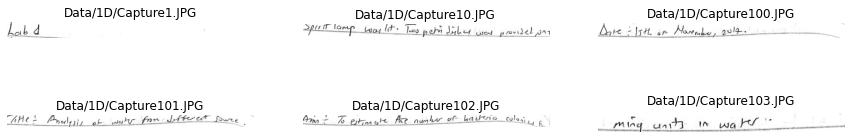

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = 'drive/MyDrive/Colab Notebooks/Handwriting Classification/'+data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(data_train.loc[i, 'image'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
#Cleaning Data

In [ ]:
image.shape

(29, 329)

In [ ]:
image

array([[255, 255, 255, ..., 253, 254, 255],
       [255, 255, 255, ..., 253, 255, 255],
       [255, 255, 255, ..., 253, 255, 255],
       ...,
       [161, 174, 170, ..., 255, 255, 255],
       [229, 236, 228, ..., 255, 255, 255],
       [255, 255, 252, ..., 255, 255, 255]], dtype=uint8)

(-0.5, 328.5, 28.5, -0.5)

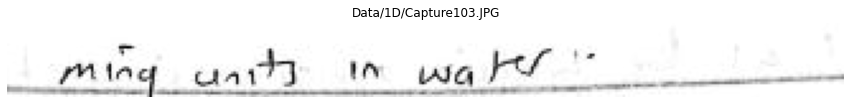

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(image, cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 512])*255 # blank white image
    
    # crop
    if w > 512:
        img = img[:, :512]
        
    if h > 64:
        img = img[:64, :]
    

    final_img[:h, :w] = img
    return final_img

In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.8 GB  | Proc size: 112.3 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [ ]:
#if not 0%, use this code
!kill -9 -1

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   33G   37G  48% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
shm             5.8G     0  5.8G   0% /dev/shm
/dev/sda1        75G   34G   42G  45% /opt/bin
tmpfs           6.4G   40K  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  755M   15G   5% /content/drive


In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
--2021-01-26 15:48:17--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.222, 91.189.89.223, 2001:67c:1560:8003::8004, ...
Connecting to launchpad.net (launchpad.net)|91.189.89.222|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-01-26 15:48:18 ERROR 404: Not Found.

dpkg: error: cannot access archive 'google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb': No such file or directory
Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
··········
/bin/bash: google-drive-ocamlfuse: command not found


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import h5py
from PIL import Image

fileName = 'data.h5'
numOfSamples = 10000
with h5py.File(fileName, "w") as out:
  out.create_dataset("data",(numOfSamples,64,512,3),dtype='u1')

In [ ]:
with h5py.File(fileName, "a") as out_2:
  data_size = 1882
  data_1 = []
  for i in range(data_size):
      img_dir = 'drive/MyDrive/Colab Notebooks/Handwriting Classification/'+data_train.loc[i, 'image']
      image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
      image = preprocess(image)
      image = image/255.
      data_1.append(image)
      out_2['X'] = np.asarray(image)

RuntimeError: ignored

In [ ]:
data_size = 1882
data_1 = []
for i in range(data_size):
    img_dir = 'drive/MyDrive/Colab Notebooks/Handwriting Classification/'+data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    data_1.append(image)

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
from numpy import save
from numpy import load
import matplotlib.pyplot as plt

In [ ]:
from numpy import save
from numpy import load

In [ ]:
import os
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
zip_path = 'drive/MyDrive/Colab_Notebooks/Handwriting_Classification/Data.zip'

In [ ]:
!cp “{zip_path}” .

cp: cannot stat '“drive/MyDrive/Colab_Notebooks/Handwriting_Classification/Data.zip”': No such file or directory


In [ ]:
!unzip "drive/MyDrive/Colab_Notebooks/Handwriting_Classification/Data.zip" -d "/content"

Archive:  drive/MyDrive/Colab_Notebooks/Handwriting_Classification/Data.zip
   creating: /content/Data/10D/
 extracting: /content/Data/10D/1001.PNG  
 extracting: /content/Data/10D/1002.PNG  
 extracting: /content/Data/10D/1003.PNG  
 extracting: /content/Data/10D/1004.PNG  
 extracting: /content/Data/10D/1005.PNG  
 extracting: /content/Data/10D/1006.PNG  
 extracting: /content/Data/10D/1007.PNG  
 extracting: /content/Data/10D/1008.PNG  
 extracting: /content/Data/10D/1009.PNG  
 extracting: /content/Data/10D/101.PNG  
 extracting: /content/Data/10D/1010.PNG  
 extracting: /content/Data/10D/1011.PNG  
 extracting: /content/Data/10D/1012.PNG  
 extracting: /content/Data/10D/1013.PNG  
 extracting: /content/Data/10D/1014.PNG  
 extracting: /content/Data/10D/1015.PNG  
 extracting: /content/Data/10D/1016a.PNG  
 extracting: /content/Data/10D/1016b.PNG  
 extracting: /content/Data/10D/1017.PNG  
 extracting: /content/Data/10D/1018.PNG  
 extracting: /content/Data/10D/102a.PNG  
 extracti

In [ ]:
data_train = pd.read_csv('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/dat.csv')

In [ ]:
data_train

,image,label
0,Data/1D/Capture1.JPG,1
1,Data/1D/Capture10.JPG,1
2,Data/1D/Capture100.JPG,1
3,Data/1D/Capture101.JPG,1
4,Data/1D/Capture102.JPG,1
...,...,...
1877,Data/10D/919.PNG,10
1878,Data/10D/920.PNG,10
1879,Data/10D/921.PNG,10
1880,Data/10D/922.PNG,10


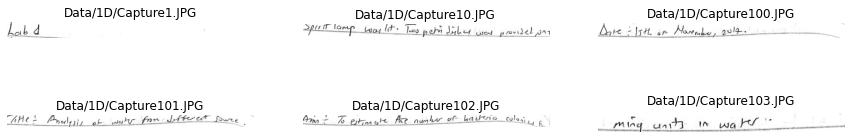

In [ ]:
plt.figure(figsize=(15, 10))

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap = 'gray')
    plt.title(data_train.loc[i, 'image'], fontsize=12)
    plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=-0.8)

In [ ]:
image.shape

(29, 329)

(-0.5, 328.5, 28.5, -0.5)

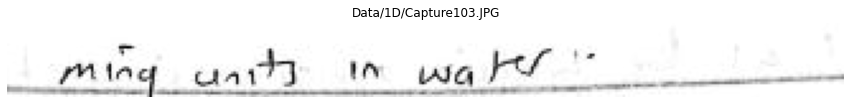

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(image, cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
def preprocess(img):
    (h, w) = img.shape
    
    final_img = np.ones([64, 512])*255 # blank white image
    
    # crop
    if w > 512:
        img = img[:, :512]
        
    if h > 64:
        img = img[:64, :]
    

    final_img[:h, :w] = img
    return final_img

In [ ]:
data_size = 1882
data_1 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = preprocess(image)
    image = image/255.
    data_1.append(image)

In [ ]:
data_size = 1882
data_2 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (300,30))
    image = preprocess(image)
    image = image/255.
    data_2.append(image)

(-0.5, 511.5, 63.5, -0.5)

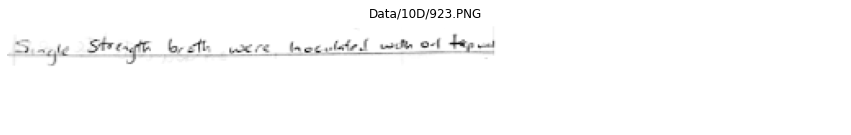

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(data_2[1881], cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
data_size = 1882
data_3 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.flip(image, 0) #vertical flip
    image = preprocess(image)
    image = image/255.
    data_3.append(image)

In [ ]:
data_size = 1882
data_4 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.flip(image, 1) #horizontal flip
    image = preprocess(image)
    image = image/255.
    data_4.append(image)

In [ ]:
#Blurring
from scipy import ndimage

data_size = 1882
data_5 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = ndimage.gaussian_filter(image, sigma= 0.7)
    image = preprocess(image)
    image = image/255.
    data_5.append(image)

In [ ]:
# histogram equalization function
def hist(img):
    #img_to_bgr = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    #hist_equalization_result = cv2.cvtColor(hist_equalization_result, cv2.COLOR_BGR2GRAY)
    return hist_equalization_result

In [ ]:
# histogram equalization function
data_size = 1882
data_6 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir)
    hist(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = preprocess(image)
    image = image/255.
    data_6.append(image)

In [ ]:
data_6[1881].shape

(64, 512)

(-0.5, 511.5, 63.5, -0.5)

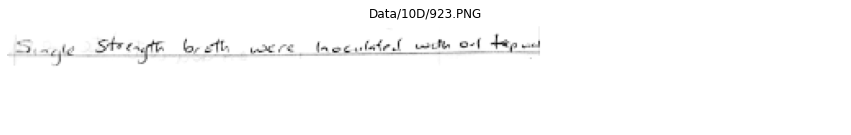

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(data_6[1881], cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
#90 degrees clockwise rotate
data_size = 1882
data_7 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    image = preprocess(image)
    image = image/255.
    data_7.append(image)

In [ ]:
#90 degrees counter clockwise rotate
data_size = 1882
data_8 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    image = preprocess(image)
    image = image/255.
    data_8.append(image)

In [ ]:
#180 degrees counter clockwise rotate
data_size = 1882
data_9 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.rotate(image, cv2.ROTATE_180)
    image = preprocess(image)
    image = image/255.
    data_9.append(image)

In [ ]:
#flip vertical and horizontal
data_size = 1882
data_10 = []
for i in range(data_size):
    img_dir = data_train.loc[i, 'image']
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    image = cv2.flip(image, -1) #vertical and horizontal flip
    image = preprocess(image)
    image = image/255.
    data_10.append(image)

In [ ]:
data_size = 1882
data_1_x = []
for i in range(data_size):
    img = data_1[i]
    image = cv2.resize(img, (256,32))
    data_1_x.append(image)
data_1_x = np.asarray(data_1_x)

(-0.5, 255.5, 31.5, -0.5)

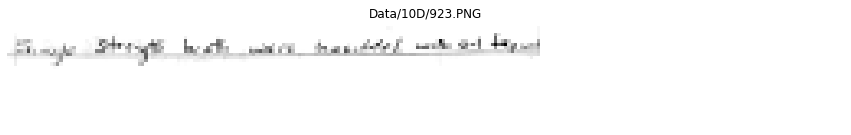

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(data_1_x[1881], cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
data_size = 1882
data_2_x = []
for i in range(data_size):
    img = data_2[i]
    image = cv2.resize(img, (256,32))
    data_2_x.append(image)
data_2_x = np.asarray(data_2_x)

(-0.5, 255.5, 31.5, -0.5)

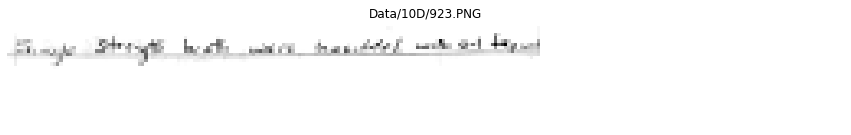

In [ ]:
plt.figure(figsize=(15, 2))
plt.imshow(data_1_x[1881], cmap = 'gray')
plt.title(data_train.loc[i, 'image'], fontsize=12)
plt.axis('off')

In [ ]:
data_size = 1882
data_3_x = []
for i in range(data_size):
    img = data_3[i]
    image = cv2.resize(img, (256,32))
    data_3_x.append(image)
data_3_x = np.asarray(data_3_x)

In [ ]:
data_size = 1882
data_4_x = []
for i in range(data_size):
    img = data_4[i]
    image = cv2.resize(img, (256,32))
    data_4_x.append(image)
data_4_x = np.asarray(data_4_x)

In [ ]:
data_size = 1882
data_5_x = []
for i in range(data_size):
    img = data_5[i]
    image = cv2.resize(img, (256,32))
    data_5_x.append(image)
data_5_x = np.asarray(data_5_x)

In [ ]:
data_size = 1882
data_6_x = []
for i in range(data_size):
    img = data_6[i]
    image = cv2.resize(img, (256,32))
    data_6_x.append(image)
data_6_x = np.asarray(data_6_x)

In [ ]:
data_size = 1882
data_7_x = []
for i in range(data_size):
    img = data_7[i]
    image = cv2.resize(img, (256,32))
    data_7_x.append(image)
data_7_x = np.asarray(data_7_x)

In [ ]:
data_size = 1882
data_8_x = []
for i in range(data_size):
    img = data_8[i]
    image = cv2.resize(img, (256,32))
    data_8_x.append(image)
data_8_x = np.asarray(data_8_x)

In [ ]:
data_size = 1882
data_9_x = []
for i in range(data_size):
    img = data_9[i]
    image = cv2.resize(img, (256,32))
    data_9_x.append(image)
data_9_x = np.asarray(data_9_x)

In [ ]:
data_size = 1882
data_10_x = []
for i in range(data_size):
    img = data_10[i]
    image = cv2.resize(img, (256,32))
    data_10_x.append(image)
data_10_x = np.asarray(data_10_x)

In [ ]:
data_1_label = data_train['label']
data_2_label = data_train['label']
data_3_label = data_train['label']
data_4_label = data_train['label']
data_5_label = data_train['label']
data_6_label = data_train['label']
data_7_label = data_train['label']
data_8_label = data_train['label']
data_9_label = data_train['label']
data_10_label = data_train['label']

In [ ]:
data = np.concatenate((data_1_x, data_2_x, data_3_x, data_4_x, data_5_x, data_6_x, data_7_x, data_8_x, data_9_x, data_10_x), axis=0)

In [ ]:
data.shape

(18820, 32, 256)

In [ ]:
labels = np.concatenate((data_1_label, data_2_label, data_3_label, data_4_label, data_5_label, data_6_label, data_7_label, data_8_label, data_9_label, data_10_label), axis=0)

In [ ]:
from numpy import save
from numpy import load

In [ ]:
labels.shape

(18820,)

In [ ]:
save('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/data.npy', data)
#data = load('data.npy')

In [ ]:
save('drive/MyDrive/Colab_Notebooks/Handwriting_Classification/labels.npy', labels)
#data = load('la.npy')

In [ ]:
#Machine Learning

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data
X.shape

(18820, 32, 256)

In [ ]:
X = X.reshape((-1,32,256,1))
X.shape

(18820, 32, 256, 1)

In [ ]:
y = []
for i in labels:
    if i == 1:
        ts = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==2:
        ts = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==3:
        ts = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==4:
        ts = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==5:
        ts = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==6:
        ts = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
    elif i ==7:
        ts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
    elif i ==8:
        ts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
    elif i ==9:
        ts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
    elif i ==10:
        ts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
    y.append(ts)
y = np.asarray(y, dtype=np.float32)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(16938, 32, 256, 1)
(1882, 32, 256, 1)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(16938, 10)
(1882, 10)


DNN

In [ ]:
# Initialize the constructor
model = Sequential()

# Add an input layer

model.add(Dense(12, activation='relu', input_shape = (32, 256, 1)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))
model.add(Flatten())

# Add an output layer 
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32, 256, 12)       24        
_________________________________________________________________
dense_4 (Dense)              (None, 32, 256, 8)        104       
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                655370    
Total params: 655,498
Trainable params: 655,498
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1)

Epoch 1/100
170/170 [==============================] - 4s 12ms/step - loss: 0.3888 - accuracy: 0.1539
Epoch 2/100
170/170 [==============================] - 2s 12ms/step - loss: 0.2677 - accuracy: 0.3947
Epoch 3/100
170/170 [==============================] - 2s 11ms/step - loss: 0.2463 - accuracy: 0.4596
Epoch 4/100
170/170 [==============================] - 2s 11ms/step - loss: 0.2316 - accuracy: 0.5096
Epoch 5/100
170/170 [==============================] - 2s 11ms/step - loss: 0.2193 - accuracy: 0.5559
Epoch 6/100
170/170 [==============================] - 2s 12ms/step - loss: 0.2088 - accuracy: 0.5804
Epoch 7/100
170/170 [==============================] - 2s 12ms/step - loss: 0.2024 - accuracy: 0.6027
Epoch 8/100
170/170 [==============================] - 2s 11ms/step - loss: 0.1961 - accuracy: 0.6219
Epoch 9/100
170/170 [==============================] - 2s 11ms/step - loss: 0.1894 - accuracy: 0.6302
Epoch 10/100
170/170 [==============================] - 2s 11ms/step - loss: 0.184

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
print(confusion_matrix(np.argmax(y_test, axis = 1), y_pred))
print('\n')
print(classification_report(np.argmax(y_test, axis = 1), y_pred))

[[ 81   9   6   1   6   6   3  11   4   0]
 [ 18 150  10   5   8   3   6  12   1   3]
 [  0   6 162  15   1   1  12   9   0   4]
 [  6   3  14 139   0   0   6   6   8   7]
 [  3   8   5   2 138  14   2   7   2   6]
 [  5  10   4   4  23  92   3   6   3   1]
 [  7   8  15  10   1   1 141  36   3   2]
 [  5   6   5   3   0   3  20 152   6   3]
 [  1   1   9   1   1   0   4   6 142  17]
 [  1   1   3  10   1   0   2   0  23 152]]


              precision    recall  f1-score   support

           0       0.64      0.64      0.64       127
           1       0.74      0.69      0.72       216
           2       0.70      0.77      0.73       210
           3       0.73      0.74      0.73       189
           4       0.77      0.74      0.75       187
           5       0.77      0.61      0.68       151
           6       0.71      0.63      0.67       224
           7       0.62      0.75      0.68       203
           8       0.74      0.78      0.76       182
           9       0.78   

DNN with RMSProp

In [ ]:
rmsprop = RMSprop(lr = 0.0001, decay = 1e-6)
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=100, batch_size=100, verbose=1)

Epoch 1/100
170/170 [==============================] - 3s 12ms/step - loss: 0.0476 - accuracy: 0.9318
Epoch 2/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0438 - accuracy: 0.9352
Epoch 3/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0427 - accuracy: 0.9334
Epoch 4/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0422 - accuracy: 0.9349
Epoch 5/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0424 - accuracy: 0.9349
Epoch 6/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0430 - accuracy: 0.9335
Epoch 7/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0416 - accuracy: 0.9363
Epoch 8/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0409 - accuracy: 0.9395
Epoch 9/100
170/170 [==============================] - 2s 12ms/step - loss: 0.0413 - accuracy: 0.9381
Epoch 10/100
170/170 [==============================] - 2s 12ms/step - loss: 0.040

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
print(confusion_matrix(np.argmax(y_test, axis = 1), y_pred))
print('\n')
print(classification_report(np.argmax(y_test, axis = 1), y_pred))

[[ 76   9   7   4   9   6   5   8   2   1]
 [ 12 143  12   6  11   9   9   9   2   3]
 [  0   4 159  18   2   2  10   9   0   6]
 [  4   1  17 133   1   1   6   5   8  13]
 [  1   7   5   4 140  15   2   5   1   7]
 [  4   8   6   5  22  97   2   3   2   2]
 [  6   4  15  13   2   3 144  29   5   3]
 [  3   2  10   7   2   3  20 147   5   4]
 [  0   1   7   2   1   1   1   4 141  24]
 [  0   2   4   5   1   0   1   0  19 161]]


              precision    recall  f1-score   support

           0       0.72      0.60      0.65       127
           1       0.79      0.66      0.72       216
           2       0.66      0.76      0.70       210
           3       0.68      0.70      0.69       189
           4       0.73      0.75      0.74       187
           5       0.71      0.64      0.67       151
           6       0.72      0.64      0.68       224
           7       0.67      0.72      0.70       203
           8       0.76      0.77      0.77       182
           9       0.72   

In [ ]:
model = Sequential()

model.add(Conv2D(16,(5,5),padding='same',input_shape = (32, 256, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
#model.add(Dropout(0.4))

model.add(Conv2D(32,(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding = 'same'))
#model.add(Dropout(0.6))

model.add(Conv2D(64,(5,5),padding='same'))
model.add(Activation('relu'))
#model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 256, 16)       416       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 256, 16)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 128, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 128, 32)       12832     
_________________________________________________________________
activation_5 (Activation)    (None, 16, 128, 32)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 64, 32)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 64, 64)        

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                   
model.fit(X_train, y_train, epochs=300, batch_size=100, verbose=100)

NameError: ignored